In [8]:
import pandas as pd
import numpy as np

In [9]:
# ANOVA 하기 위한 코드
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

### month_long_term_frgn 장기체류

In [10]:
long_df = pd.read_csv(r'C:\Users\이현아\Desktop\월별데이터 정리\month_long_term_frgn.csv')
long_df

,m,nationality,emd_cd,emd_nm,count_num,sum_resd_pop_cnt,sum_work_pop_cnt,sum_visit_pop_cnt
0,2018-01,AUS,50110590,건입동,33,0.0000,0.0000,193.1805
1,2018-01,AUS,50110256,구좌읍,40,0.0000,0.0000,251.2195
2,2018-01,AUS,50130253,남원읍,107,0.0000,0.0000,648.0345
3,2018-01,AUS,50110660,노형동,761,11855.9924,738.9594,2612.7042
4,2018-01,AUS,50130590,대륜동,563,2701.0357,1576.0168,200.4630
...,...,...,...,...,...,...,...,...
52233,2021-06,VNM,50130320,표선면,919,2646.5554,0.0000,7603.5847
52234,2021-06,VNM,50110310,한경면,1366,45349.6490,1121.2861,75816.8162
52235,2021-06,VNM,50110250,한림읍,1440,97147.6156,3820.6787,61844.2041
52236,2021-06,VNM,50110600,화북동,1375,13436.5104,2574.8044,8554.9721


##### sum_resd_pop_cnt ~ nationality  0

In [11]:
# 일원배치 분산분석
model1 = ols('sum_resd_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model1))
#기각 (의미있음)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)     30.0  2.744709e+13  9.149030e+11  428.764261     0.0
Residual        52207.0  1.114000e+14  2.133814e+09         NaN     NaN


In [12]:
# 다중비교 (Tukey)

posthoc1 = pairwise_tukeyhsd(long_df['sum_resd_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc1)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
   AUS    BGD   -1311.6941    0.9   -7217.4962    4594.1079  False
   AUS    CAN    2741.4232    0.9   -3046.8233    8529.6697  False
   AUS    CHN  123890.1723  0.001  118101.9258  129678.4188   True
   AUS    DEU    -2085.929    0.9   -7957.4773    3785.6193  False
   AUS    EGY   -2196.3489    0.9   -9727.0215    5334.3237  False
   AUS    ETC    3840.6067 0.7555   -1947.6397    9628.8532  False
   AUS    FRA   -1828.6695    0.9   -7650.4241    3993.0852  False
   AUS    GBR    1599.7012    0.9   -4191.7556     7391.158  False
   AUS    IDN   10705.8087  0.001    4917.5622   16494.0552   True
   AUS    IND    -282.3695    0.9    -6081.907     5517.168  False
   AUS    JPN    1150.5625    0.9    -4637.684    6938.8089  False
   AUS    KAZ   -1573.2897    0.9   -7391.7155    4245.1362  F

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


<AxesSubplot:xlabel='nationality', ylabel='sum_resd_pop_cnt'>

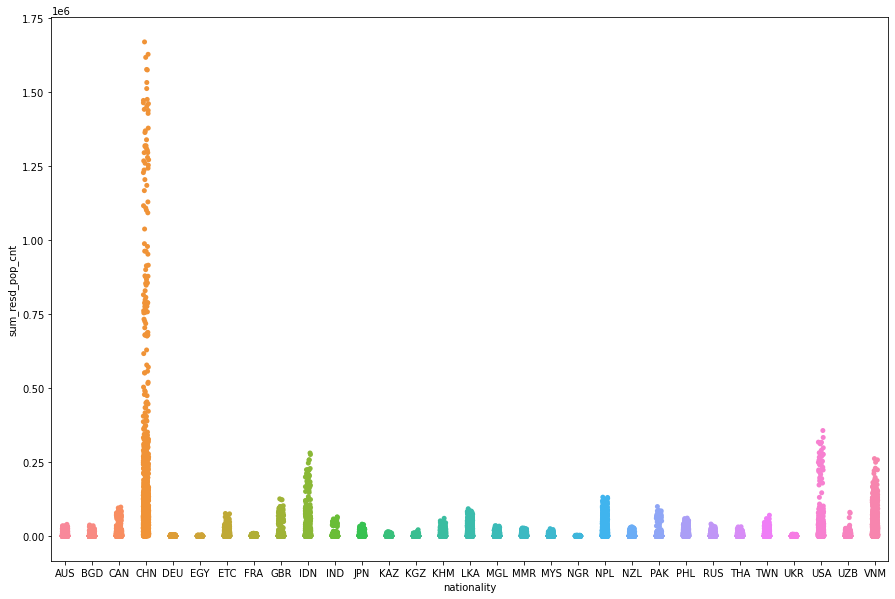

In [14]:
x = long_df['nationality']
y = long_df['sum_resd_pop_cnt']
sns.stripplot(x, y, data=long_df)


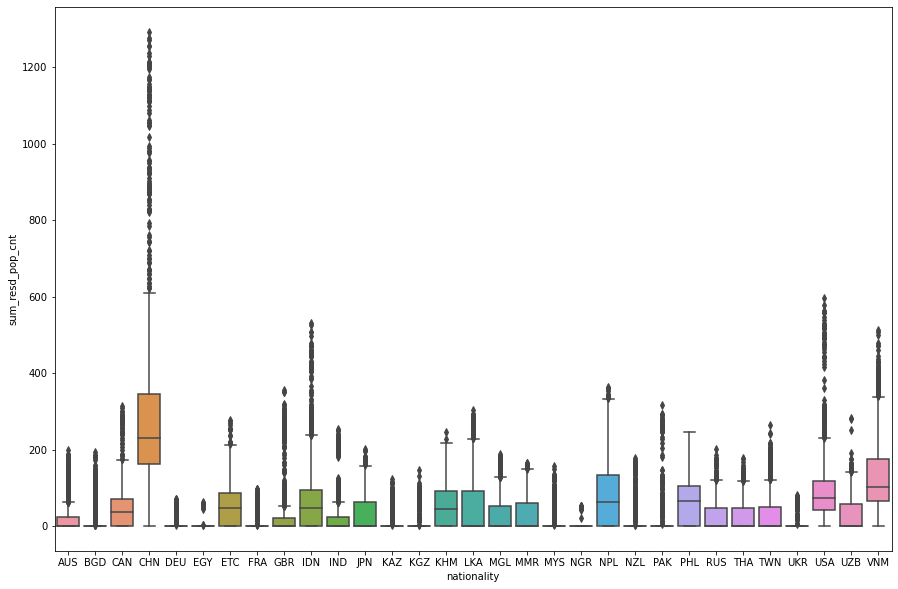

In [16]:
x = long_df['nationality']
y = np.sqrt(long_df['sum_resd_pop_cnt'])


sns.boxplot(x, y, data=long_df)


#plt.ylim(0,0.6)
plt.show()

# AUS GBR IND (3)
# JPN MGL MMR RUS THA TWN LZB (7)
# BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
# CAN ETC IDN KHM LKA NPL PHL USA VNM (9)
# CHN  (1)

In [17]:
# GROUP 1 : AUS GBR IND (3)
# GROUP 2 : JPN MGL MMR RUS THA TWN LZB (7)
# GROUP 3 : BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
# GROUP 4 : CAN ETC IDN KHM LKA NPL PHL USA(8)
# GROUP 5 : CHN VNM (2)

In [18]:
# GROUP 1
a = long_df[long_df['nationality']=='AUS']
b = long_df[long_df['nationality']=='GBR']
c = long_df[long_df['nationality']=='IND']
G1 = pd.concat([a,b])
G1 = pd.concat([G1,c])

In [19]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G1).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G1['sum_resd_pop_cnt'], G1['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     2.0  3.708067e+09  1.854034e+09  18.469638  1.014072e-08
Residual        5396.0  5.416655e+11  1.003828e+08        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   AUS    GBR  1599.7012  0.001   817.5133  2381.8891   True
   AUS    IND  -282.3695 0.6601 -1065.6488   500.9097  False
   GBR    IND -1882.0707  0.001 -2665.6747 -1098.4667   True
------------------------------------------------------------


In [20]:
# GROUP 2 : JPN MGL MMR RUS THA TWN LZB (7)
a = long_df[long_df['nationality']=='JPN']
b = long_df[long_df['nationality']=='MGL']
c = long_df[long_df['nationality']=='MMR']
d = long_df[long_df['nationality']=='RUS']
e = long_df[long_df['nationality']=='THA']
f = long_df[long_df['nationality']=='TWN']
g = long_df[long_df['nationality']=='LZB']

G2 = pd.concat([a,b,c,d,e,f,g])

In [21]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G2).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G2['sum_resd_pop_cnt'], G2['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)      5.0  4.760644e+09  9.521289e+08  30.059118  1.900433e-30
Residual        10795.0  3.419339e+11  3.167521e+07        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   JPN    MGL   -757.357  0.001 -1291.8373  -222.8767   True
   JPN    MMR  -622.2647 0.0117 -1156.6705    -87.859   True
   JPN    RUS -1612.2286  0.001 -2146.4855 -1077.9716   True
   JPN    THA -1512.7179  0.001 -2047.1981  -978.2376   True
   JPN    TWN   110.6348    0.9  -423.3996   644.6691  False
   MGL    MMR   135.0923    0.9  -399.9807   670.1653  False
   MGL    RUS  -854.8716  0.001 -1389.7959  -319.9472   True
   MGL    THA  -755.3608  0.001 -1290.5082  -220.2135   True
   MGL    TWN   867.9918  0.001   333.2898  1402.6937   True
   MMR    RUS  -989.9639  0.001 -1524

In [22]:
# GROUP 3 : BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
a = long_df[long_df['nationality']=='BGD']
b = long_df[long_df['nationality']=='DEU']
c = long_df[long_df['nationality']=='EGY']
d = long_df[long_df['nationality']=='FRA']
e = long_df[long_df['nationality']=='KAZ']
f = long_df[long_df['nationality']=='KGZ']
g = long_df[long_df['nationality']=='MYS']
h = long_df[long_df['nationality']=='NGR']
i = long_df[long_df['nationality']=='NZL']
j = long_df[long_df['nationality']=='PAK']
k = long_df[long_df['nationality']=='UKR']

G3 = pd.concat([a,b,c,d,e,f,g,h,i,j,k])

In [23]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G3).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G3['sum_resd_pop_cnt'], G3['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     10.0  5.950430e+09  5.950430e+08  35.009825  2.259310e-68
Residual        16174.0  2.749007e+11  1.699646e+07        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   BGD    DEU  -774.2349  0.001 -1231.0927   -317.377   True
   BGD    EGY  -884.6547  0.001 -1466.2141  -303.0953   True
   BGD    FRA  -516.9753 0.0109   -970.107   -63.8437   True
   BGD    KAZ  -261.5955 0.7158  -714.4781   191.2871  False
   BGD    KGZ  -325.2489  0.481  -793.5623   143.0646  False
   BGD    MYS  -348.5537 0.3257  -803.8431   106.7357  False
   BGD    NGR  -881.6149  0.001 -1541.9155  -221.3144   True
   BGD    NZL   130.5154    0.9  -322.6787   583.7095  False
   BGD    PAK  1276.6711  0.001   823.5394  1729.8028   True
   BGD    UKR  -805.9858  0.001 -1311

In [24]:
# GROUP 4 : CAN ETC IDN KHM LKA NPL PHL USA(8)
a = long_df[long_df['nationality']=='CAN']
b = long_df[long_df['nationality']=='ETC']
c = long_df[long_df['nationality']=='IDN']
d = long_df[long_df['nationality']=='KHM']
e = long_df[long_df['nationality']=='LKA']
f = long_df[long_df['nationality']=='NPL']
g = long_df[long_df['nationality']=='PHL']
h = long_df[long_df['nationality']=='USA']

G4 = pd.concat([a,b,c,d,e,f,g,h])

In [25]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G4).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G4['sum_resd_pop_cnt'], G4['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F         PR(>F)
C(nationality)      7.0  2.447350e+11  3.496214e+10  73.060764  2.148854e-104
Residual        14433.0  6.906696e+12  4.785350e+08        NaN            NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   CAN    ETC  1099.1836 0.7767 -1107.5146  3305.8817  False
   CAN    IDN  7964.3855  0.001  5757.6874 10171.0837   True
   CAN    KHM   650.1765    0.9 -1557.4394  2857.7923  False
   CAN    LKA  3904.3766  0.001  1697.0669  6111.6863   True
   CAN    NPL  9293.1887  0.001  7086.4906 11499.8869   True
   CAN    PHL  2583.3711 0.0093   376.0614  4790.6807   True
   CAN    USA 11574.2522  0.001  9367.5541 13780.9504   True
   ETC    IDN   6865.202  0.001  4658.5038  9071.9001   True
   ETC    KHM  -449.0071    0.9  -2656.623  1758.6088  False
   ETC    LKA   2805.193  0.003   

In [26]:
# GROUP 5 : CHN VNM (2)
a = long_df[long_df['nationality']=='CHN']
b = long_df[long_df['nationality']=='VNM']

G5 = pd.concat([a,b])

In [27]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G5).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G5['sum_resd_pop_cnt'], G5['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq           F        PR(>F)
C(nationality)     1.0  8.920573e+12  8.920573e+12  311.795065  5.393191e-67
Residual        3610.0  1.032834e+14  2.861037e+10         NaN           NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower        upper    reject
---------------------------------------------------------------
   CHN    VNM -99392.2455 0.001 -110428.2434 -88356.2476   True
---------------------------------------------------------------


##### sum_work_pop_cnt ~ nationality  0

In [28]:
# 일원배치 분산분석
model2 = ols('sum_work_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model2))
#기각 (의미있음)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)     30.0  2.652702e+11  8.842341e+09  268.704718     0.0
Residual        52207.0  1.717990e+12  3.290728e+07         NaN     NaN


In [29]:
# 다중비교 (Tukey)

posthoc2 = pairwise_tukeyhsd(long_df['sum_work_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc2)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   AUS    BGD   -105.5899    0.9   -838.9996    627.8197  False
   AUS    CAN    268.5608    0.9   -450.2503    987.3718  False
   AUS    CHN  11958.3432  0.001  11239.5321  12677.1543   True
   AUS    DEU    -174.142    0.9   -903.2979    555.0138  False
   AUS    EGY   -197.8999    0.9  -1133.0935    737.2936  False
   AUS    ETC    332.1576    0.9   -386.6535   1050.9686  False
   AUS    FRA   -183.7722    0.9   -906.7444    539.2001  False
   AUS    GBR    134.7442    0.9   -584.4656    853.9539  False
   AUS    IDN   2167.0131  0.001   1448.2021   2885.8242   True
   AUS    IND    -56.0938    0.9   -776.3071    664.1194  False
   AUS    JPN      9.3555    0.9   -709.4555    728.1666  False
   AUS    KAZ   -165.8161    0.9    -888.375    556.7428  False
   AUS    KGZ   -181.7246    0.9   -929.

##### sum_visit_pop_cnt ~ nationality  0

In [30]:
# 일원배치 분산분석
model2 = ols('sum_visit_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model2))
#기각 (의미있음)

                     df        sum_sq       mean_sq         F  PR(>F)
C(nationality)     30.0  8.358936e+12  2.786312e+11  954.7382     0.0
Residual        52207.0  1.523611e+13  2.918404e+08       NaN     NaN


In [31]:
# 다중비교 (Tukey)

posthoc3 = pairwise_tukeyhsd(long_df['sum_visit_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc3)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   AUS    BGD    -625.087    0.9  -2809.1913   1559.0173  False
   AUS    CAN   1688.5986 0.4287   -452.0309   3829.2281  False
   AUS    CHN  62029.4933  0.001  59888.8638  64170.1228   True
   AUS    DEU   -764.0086    0.9   -2935.445   1407.4278  False
   AUS    EGY   -1079.101    0.9  -3864.1205   1705.9186  False
   AUS    ETC   2444.4282 0.0065    303.7987   4585.0577   True
   AUS    FRA   -717.2827    0.9  -2870.3042   1435.7389  False
   AUS    GBR    780.3295    0.9  -1361.4873   2922.1462  False
   AUS    IDN  22045.9299  0.001  19905.3005  24186.5594   True
   AUS    IND     -49.903    0.9  -2194.7082   2094.9021  False
   AUS    JPN    301.1458    0.9  -1839.4836   2441.7753  False
   AUS    KAZ   -597.9756    0.9  -2749.7661   1553.8149  False
   AUS    KGZ   -818.3413    0.9  -3046.

# month_short_term_frgn 단기체류

In [34]:
short_df = pd.read_csv(r'C:\Users\이현아\Desktop\월별데이터 정리\month_short_term_frgn.csv')
short_df

,m,nationality,count_num,emd_cd,emd_nm,visit_pop_cnt
0,2018-01,CHN,744,50110590,건입동,30589.4398
1,2018-01,CHN,744,50110256,구좌읍,26691.1513
2,2018-01,CHN,744,50130253,남원읍,179846.0273
3,2018-01,CHN,744,50110660,노형동,145583.1902
4,2018-01,CHN,742,50130590,대륜동,22743.8459
...,...,...,...,...,...,...
16250,2021-06,VNM,126,50110320,추자면,36.6789
16251,2021-06,VNM,39,50130320,표선면,9.2223
16252,2021-06,VNM,45,50110310,한경면,11.1088
16253,2021-06,VNM,37,50110250,한림읍,7.7552


##### visit_pop_cnt ~ nationality  0

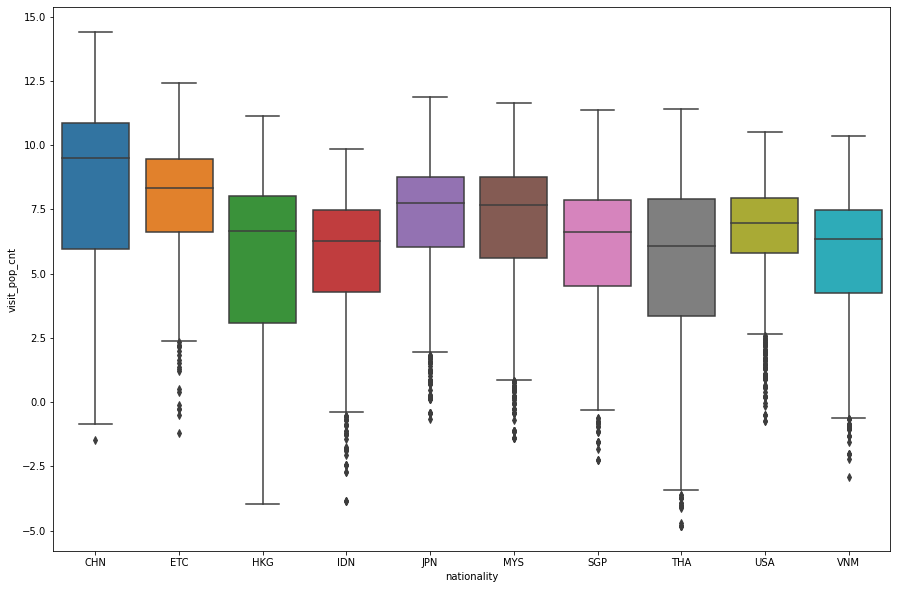

In [54]:
x = short_df['nationality']
y = np.log(short_df['visit_pop_cnt'])


sns.boxplot(x, y, data=long_df)


#plt.ylim(0,0.6)
plt.show()

In [55]:
# Group1 : CHN, ETC 
# Group2 : JPN,MYS
# Group3 : HKG,IDN,SGP,THA,USA,VNM

In [53]:
a = short_df[short_df['nationality']=='CHN']
b = short_df[short_df['nationality']=='ETC']
c = short_df[short_df['nationality']=='JPN']
d = short_df[short_df['nationality']=='MYS']
e = short_df[short_df['nationality']=='HKG']
f = short_df[short_df['nationality']=='IDN']
g = short_df[short_df['nationality']=='SGP']
h = short_df[short_df['nationality']=='THA']
i = short_df[short_df['nationality']=='USA']
j = short_df[short_df['nationality']=='VNM']

G1 = pd.concat([a,b])
G2 = pd.concat([c,d])
G3 = pd.concat([e,f,g,h,i,j])

In [58]:
# Group1
# 일원배치 분산분석(mct_cat_nm)
model = ols('visit_pop_cnt ~ C(nationality)', G1).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G1['visit_pop_cnt'], G1['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq           F        PR(>F)
C(nationality)     1.0  2.812855e+12  2.812855e+12  165.197826  5.319500e-37
Residual        3603.0  6.134896e+13  1.702719e+10         NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   CHN    ETC -55866.4953 0.001 -64388.5295 -47344.4611   True
--------------------------------------------------------------


In [60]:
# Group2
# 일원배치 분산분석(mct_cat_nm)
model = ols('visit_pop_cnt ~ C(nationality)', G2).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G2['visit_pop_cnt'], G2['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq         F    PR(>F)
C(nationality)     1.0  1.878042e+09  1.878042e+09  9.472588  0.002104
Residual        3064.0  6.074710e+11  1.982608e+08       NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff  p-adj   lower     upper   reject
---------------------------------------------------------
   JPN    MYS -1565.6167 0.0021 -2563.02 -568.2134   True
---------------------------------------------------------


In [61]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('visit_pop_cnt ~ C(nationality)', G3).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G3['visit_pop_cnt'], G3['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     5.0  4.195632e+09  8.391263e+08  30.826214  3.177994e-31
Residual        9578.0  2.607246e+11  2.722119e+07        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   HKG    IDN -1871.8372  0.001  -2396.343 -1347.3315   True
   HKG    SGP  -869.4652  0.001 -1397.0164   -341.914   True
   HKG    THA   -284.593 0.6014  -800.7796   231.5937  False
   HKG    USA  -830.4874  0.001 -1336.2017   -324.773   True
   HKG    VNM -1628.4652  0.001 -2166.4271 -1090.5033   True
   IDN    SGP  1002.3721  0.001   465.0328  1539.7113   True
   IDN    THA  1587.2443  0.001  1061.0581  2113.4305   True
   IDN    USA  1041.3499  0.001    525.433  1557.2668   True
   IDN    VNM    243.372 0.7773   -304.192    790.936  False
   SGP    THA   584.8722 0.0203    55.65

### month_resident_pop 거주인구

In [39]:
resd_df = pd.read_csv(r'C:\Users\이현아\Desktop\월별데이터 정리\month_resident_pop.csv')
resd_df

,base_year,base_month,sex,emd_cd,emd_nm,count_num,sum_resid_pop_cnt,sum_foreign_pop_cnt,sum_total_pop_cnt
0,2018,1,남성,50110590,건입동,1,5085.0,146.0,5231.0
1,2018,1,남성,50110256,구좌읍,1,7965.0,368.0,8333.0
2,2018,1,남성,50130253,남원읍,1,9806.0,428.0,10234.0
3,2018,1,남성,50110660,노형동,1,26286.0,821.0,27107.0
4,2018,1,남성,50130590,대륜동,1,6836.0,83.0,6919.0
...,...,...,...,...,...,...,...,...,...
3607,2021,6,여성,50130320,표선면,1,6033.0,123.0,6156.0
3608,2021,6,여성,50110310,한경면,1,4531.0,100.0,4631.0
3609,2021,6,여성,50110250,한림읍,1,10341.0,1140.0,11481.0
3610,2021,6,여성,50110600,화북동,1,12238.0,161.0,12399.0


##### sum_resid_pop_cnt ~ sex  X 

In [40]:
# 일원배치 분산분석
model5 = ols('sum_resid_pop_cnt ~ C(sex)', resd_df).fit()
print(anova_lm(model5))
#기각안됨 (의미없음)

              df        sum_sq       mean_sq         F    PR(>F)
C(sex)       1.0  6.638058e+06  6.638058e+06  0.160473  0.688745
Residual  3610.0  1.493295e+11  4.136553e+07       NaN       NaN


In [41]:
# 다중비교 (Tukey)

posthoc5 = pairwise_tukeyhsd(resd_df['sum_resid_pop_cnt'], resd_df['sex'], alpha=0.05)
print(posthoc5)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    남성     여성 -85.7386 0.6997 -505.3712 333.8939  False
-------------------------------------------------------


##### sum_foreign_pop_cnt ~ nationality  O 

In [42]:
# 일원배치 분산분석
model6 = ols('sum_foreign_pop_cnt ~ C(sex)', resd_df).fit()
print(anova_lm(model6))

#기각 (의미있음)

              df        sum_sq       mean_sq          F        PR(>F)
C(sex)       1.0  3.982061e+06  3.982061e+06  29.813586  5.077311e-08
Residual  3610.0  4.821708e+08  1.335653e+05        NaN           NaN


In [43]:
# 다중비교 (Tukey)

posthoc6 = pairwise_tukeyhsd(resd_df['sum_foreign_pop_cnt'], resd_df['sex'], alpha=0.05)
print(posthoc6)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    남성     여성 -66.4064 0.001 -90.2514 -42.5615   True
-----------------------------------------------------
